In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np

# Load Dataset
df = pd.read_csv('Employee_data.csv')  # Make sure the CSV is in the same folder

# Display first 5 rows
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [2]:
# Dataset Info
df.info()

# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Handle missing values - Example: fill or drop
df.dropna(inplace=True)  # OR use df.fillna(method='ffill', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Clean inconsistent data (if required)
# Example: df['Department'] = df['Department'].str.strip().str.title()

Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

In [4]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Mode for categorical variables
print("\nMode for Categorical Features:")
print(df.select_dtypes(include='object').mode().iloc[0])

Descriptive Statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std      

In [5]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

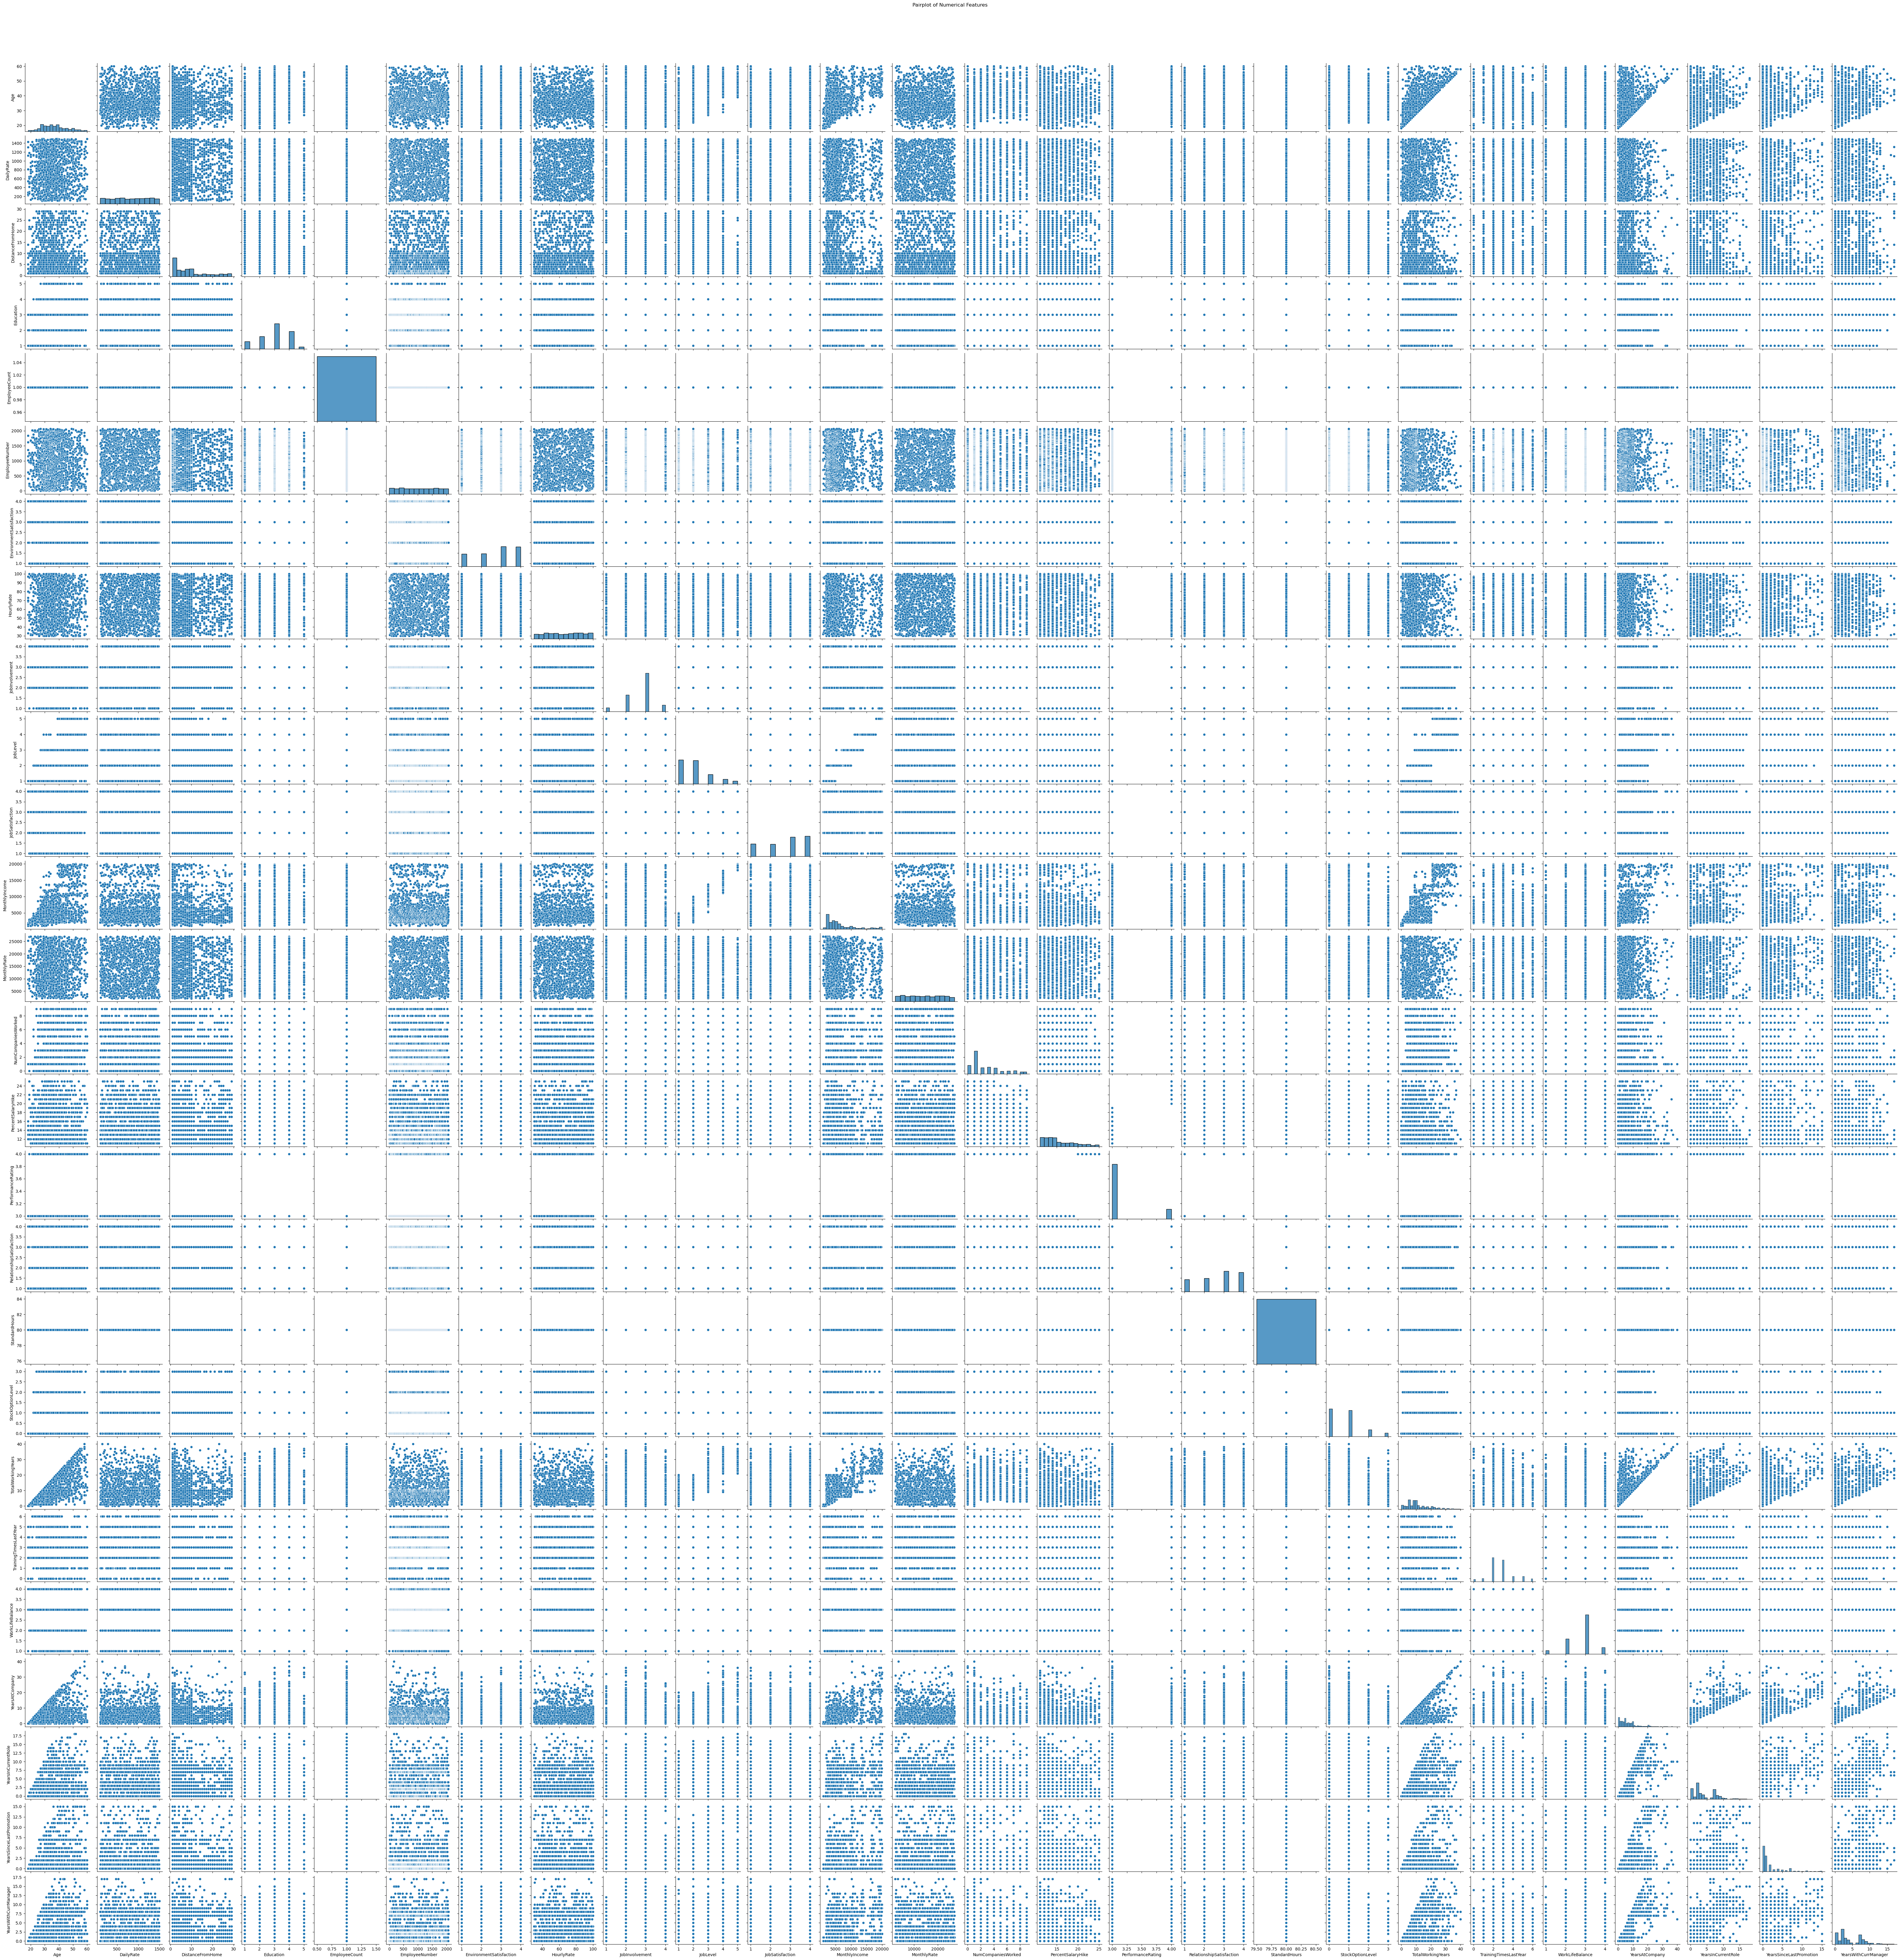

In [10]:
# Pairplot - Explore feature relationships
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

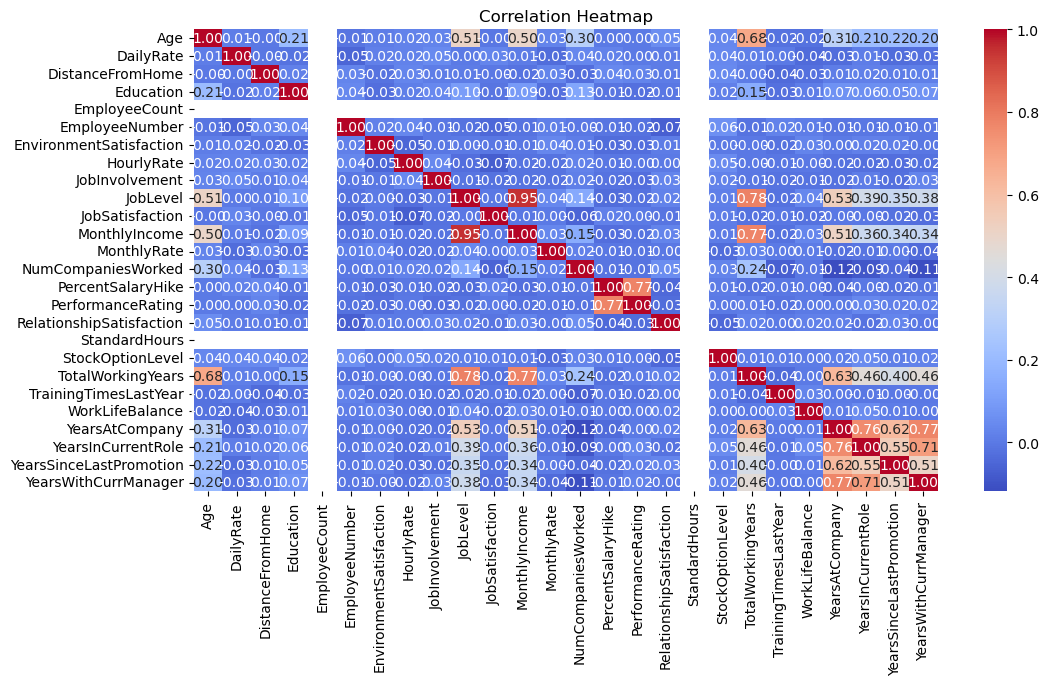

In [12]:
# Correlation Heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

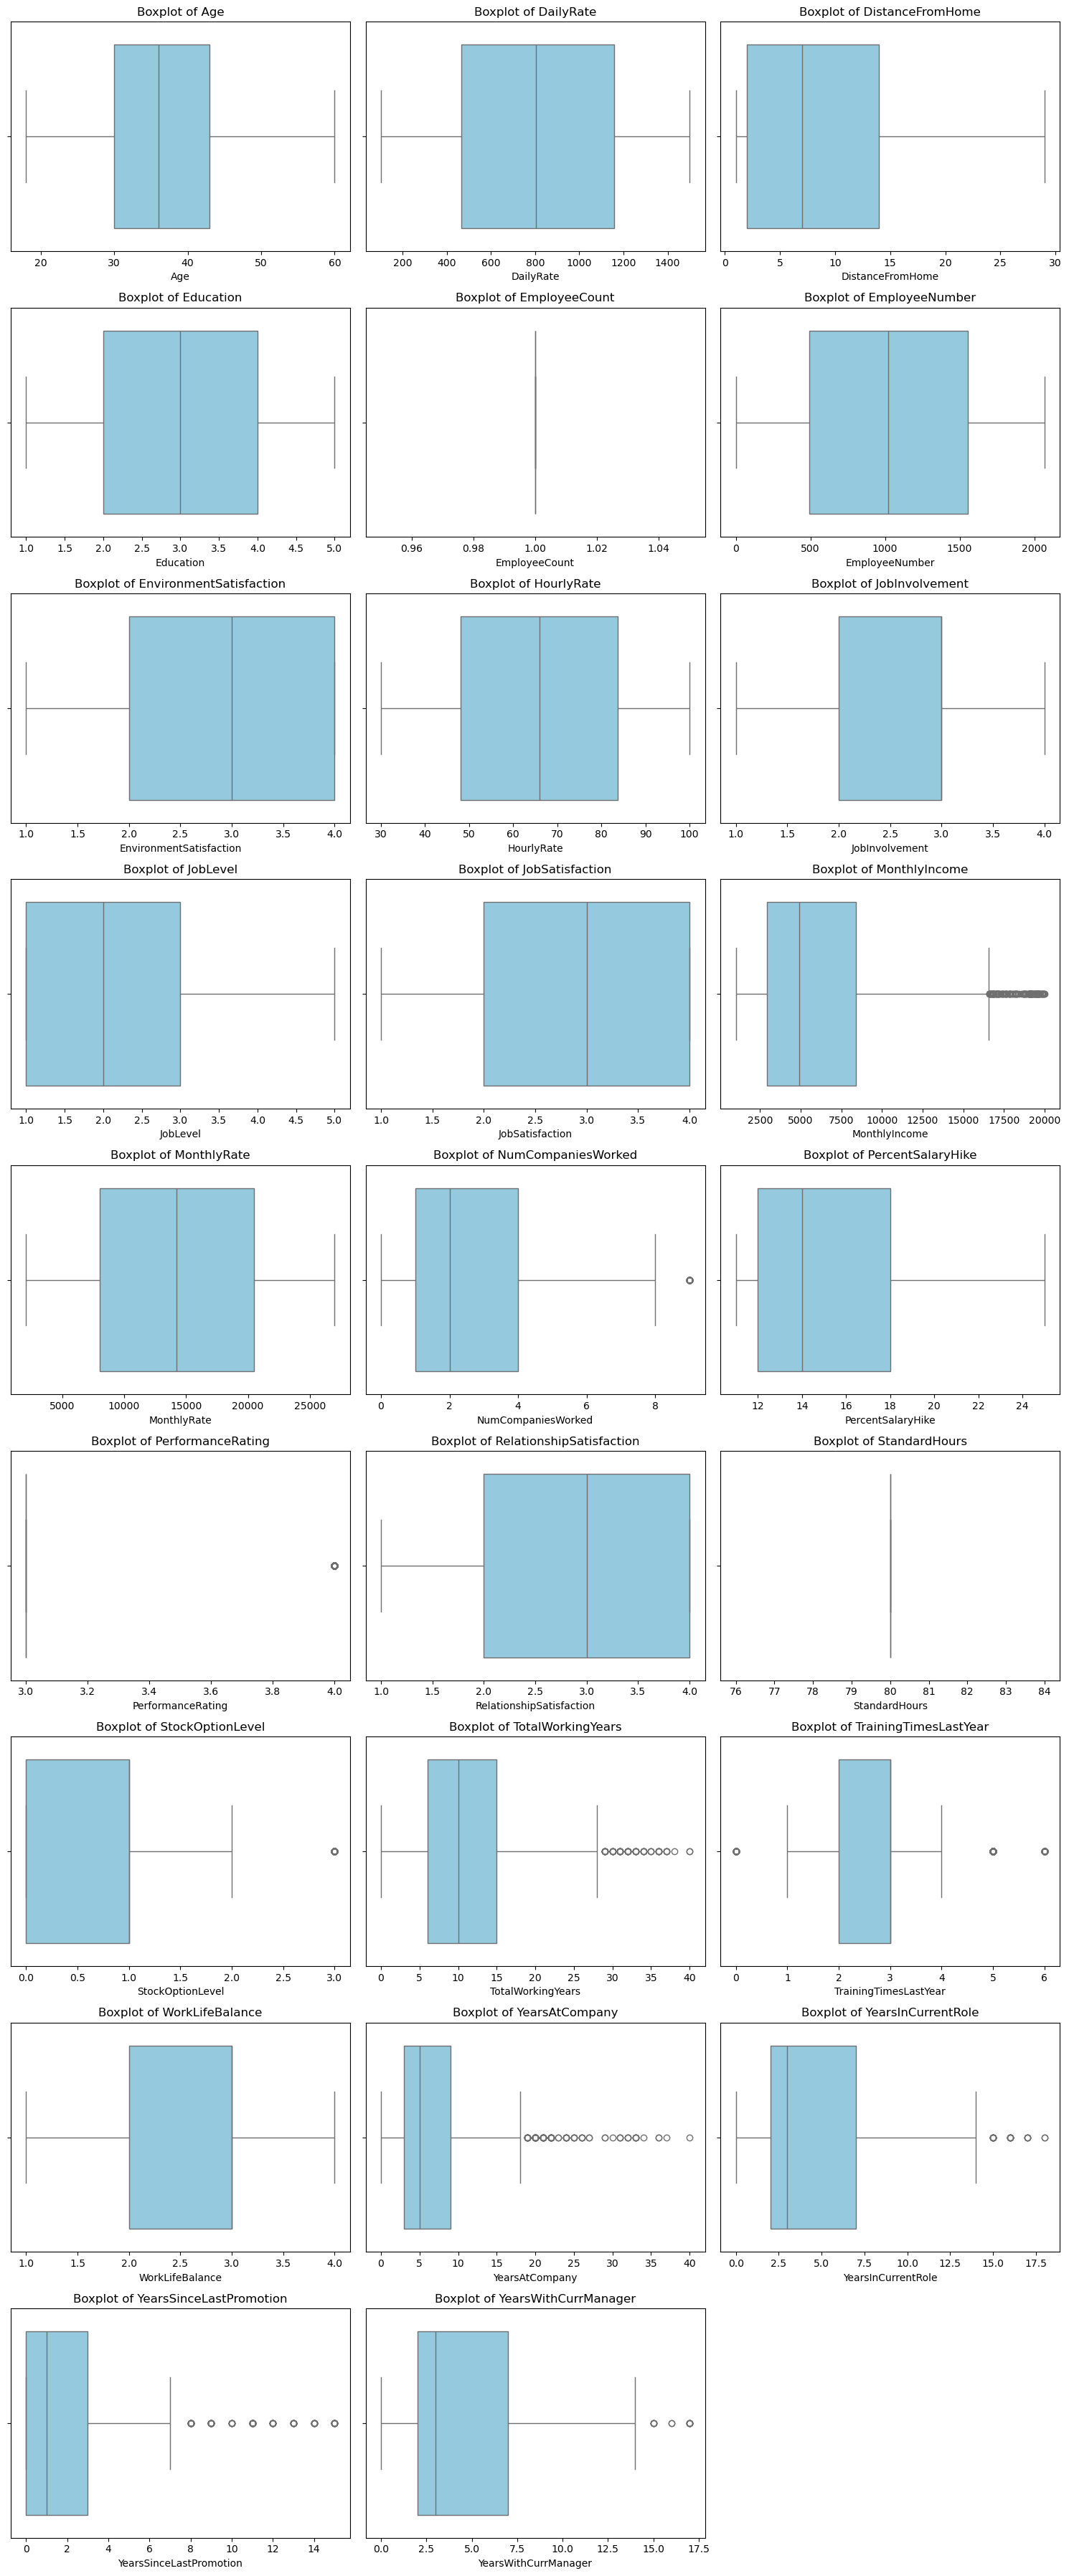

In [14]:
# Boxplots - Detect outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

import math

num_plots = len(numeric_cols)
cols = 3
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()

In [15]:
# Probability of employee leaving
attrition_prob = df['Attrition'].value_counts(normalize=True)
print("Probability of Attrition:\n", attrition_prob)

Probability of Attrition:
 Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


In [17]:
print(df.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [22]:
# Conditional Probability: P(Attrition | Low PerformanceRating)
low_perf = df[df['PerformanceRating'] <= df['PerformanceRating'].median()]
cond_prob = low_perf['Attrition'].value_counts(normalize=True)
print("P(Attrition | Low PerformanceRating):\n", cond_prob)

P(Attrition | Low PerformanceRating):
 Attrition
No     0.839228
Yes    0.160772
Name: proportion, dtype: float64


In [26]:
# Bayes' Theorem Example
# P(Attrition | PerformanceRating) ≈ [P(PerformanceRating | Attrition) * P(Attrition)] / P(PerformanceRating)

# P(Attrition)
p_attrition = (df['Attrition'] == 'Yes').mean()

# P(PerformanceRating | Attrition)
mean_perf_given_attr = df[df['Attrition'] == 'Yes']['PerformanceRating'].mean()

# P(PerformanceRating)
mean_perf = df['PerformanceRating'].mean()

# Bayes Approximation (not exact conditional probability but an illustrative use of Bayes' theorem)
p_perf_given_attr = mean_perf_given_attr / mean_perf
p_perf = 1  # assumed normalized

bayes_result = (p_perf_given_attr * p_attrition) / p_perf

print("Bayes' Theorem Approximation: P(Attrition | PerformanceRating):", bayes_result)

Bayes' Theorem Approximation: P(Attrition | PerformanceRating): 0.16134598792062121


In [27]:
from scipy.stats import f_oneway

# Group 'PerformanceRating' by 'Department'
grouped_data = [group['PerformanceRating'].values for name, group in df.groupby('Department')]

# Perform one-way ANOVA
anova_result = f_oneway(*grouped_data)

# Print results
print("ANOVA Test Result:")
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Interpretation
if anova_result.pvalue < 0.05:
    print("Significant difference in PerformanceRating across departments.")
else:
    print("No significant difference in PerformanceRating across departments.")


ANOVA Test Result:
F-statistic: 0.7940044059801677
P-value: 0.4522252122566278
No significant difference in PerformanceRating across departments.


In [28]:
#phase - 2

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [30]:
# Drop irrelevant columns (like IDs or constant values)
df_ml = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])

In [31]:
# Encode categorical features
le = LabelEncoder()
for col in df_ml.select_dtypes(include='object').columns:
    df_ml[col] = le.fit_transform(df_ml[col])

In [32]:
# Step 2: Feature Scaling
scaler = StandardScaler()
X = df_ml.drop(columns='Attrition')
X_scaled = scaler.fit_transform(X)

In [33]:
# Step 3: Prepare Target Variable
y = df_ml['Attrition']  # Already encoded (Yes/No → 1/0)

In [34]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
# Step 5: Model Training - Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Step 6: Model Evaluation
y_pred = model.predict(X_test)

In [37]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[249   6]
 [ 25  14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294

Accuracy Score: 0.8945578231292517


In [38]:
#phase - 3

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [40]:
# Step 1: Hyperparameter Tuning using GridSearchCV
params = {
    'C': [0.01, 0.1, 1, 10],           # Inverse of regularization strength
    'penalty': ['l1', 'l2'],           # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear']            # Supports both L1 and L2
}

grid = GridSearchCV(LogisticRegression(), param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [41]:
# Step 2: Evaluate Optimized Model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.65      0.28      0.39        39

    accuracy                           0.88       294
   macro avg       0.77      0.63      0.66       294
weighted avg       0.87      0.88      0.86       294



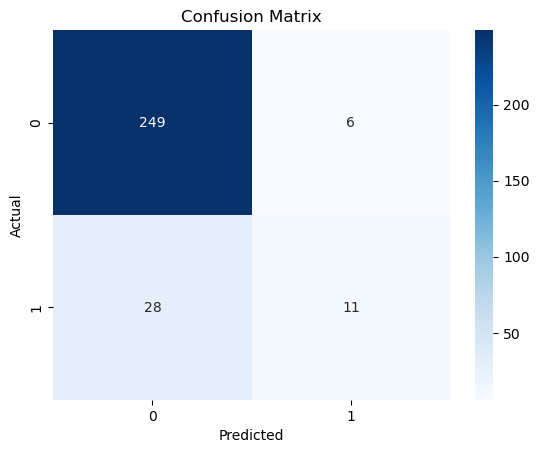

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

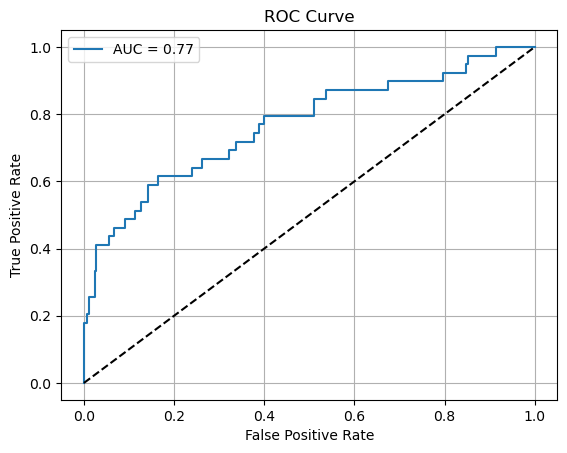

In [43]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

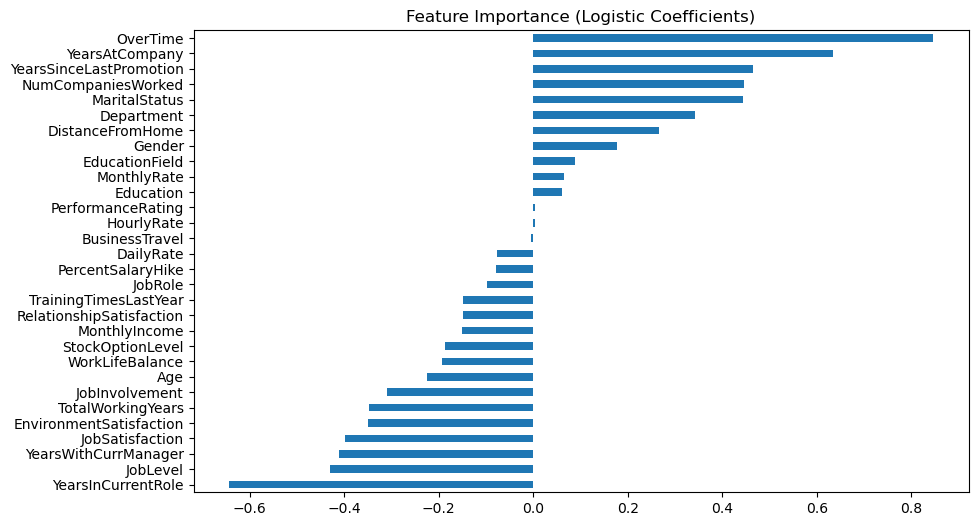

In [44]:
# Step 3: Feature Importance (Logistic Coefficients)
importance = pd.Series(best_model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance (Logistic Coefficients)")
plt.show()

In [45]:
#phase - 4

In [54]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load your CSV
df = pd.read_csv("Employee_data.csv")

# Define features
selected_features = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'JobSatisfaction',
    'EnvironmentSatisfaction', 'YearsAtCompany', 'WorkLifeBalance', 'OverTime',
    'BusinessTravel', 'DailyRate', 'Department', 'Education', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus'
]

# Prepare input and target
X = df[selected_features]
y = df['Attrition'].map({'Yes': 1, 'No': 0})  # Convert Yes/No to 1/0

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X)

# Save column names for Streamlit
joblib.dump(X_encoded.columns.tolist(), 'model_columns.pkl')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(best_model, 'attrition_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ All files saved: attrition_model.pkl, scaler.pkl, model_columns.pkl")

✅ All files saved: attrition_model.pkl, scaler.pkl, model_columns.pkl


In [55]:
# Save the model and scaler
joblib.dump(best_model, 'attrition_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_encoded.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']